# Assembling Final Datasets

## XGBoost

### XGBoost - 1. x_train. y_train, x_test, y_test

In [419]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score

In [420]:
# xgboost 참고 : https://dining-developer.tistory.com/4
# xgboost 하이퍼 파라미터 튜닝 순서 : https://www.kaggle.com/lifesailor/xgboost/notebook

In [421]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1. learning_rate와 n_estimators의 수를 정하자

In [422]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(50, 350, 50)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [423]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.5}

In [424]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1-2. n_estimators의 수를 정하자

In [425]:
learning_rate = 0.1
n_estimators = [i for i in range(100, 300, 10)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [426]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.5}

In [ ]:
# 2. max_depth와 min_child_weight를 튜닝한다.

In [427]:
learning_rate = 0.1
n_estimators = 160
max_depth = [i for i in range(3, 10, 1)]
min_child_weight = [i for i in range(1, 6, 1)]
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [428]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : max_depth,
              'min_child_weight' : min_child_weight,
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.5}

In [ ]:
# 3. gamma를 튜닝한다.

In [429]:
learning_rate = 0.1
n_estimators = 160
max_depth = 4
min_child_weight = 1
gamma = [i/10.0 for i in range(0,5,1)]
subsample = 0.5
colsample_bytree = 0.5

In [430]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : gamma,
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.5}

In [ ]:
# 4. subsample and colsample_bytree를 튜닝한다.

In [431]:
learning_rate = 0.1
n_estimators = 160
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/10.0 for i in range(4,10)]
colsample_bytree = [i/10.0 for i in range(4,10)]

In [432]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : colsample_bytree}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.9}

In [ ]:
# 5. subsample 추가 튜닝하기

In [434]:
learning_rate = 0.1
n_estimators = 160
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/100.0 for i in range(80, 99)]
colsample_bytree = 0.8

In [435]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.95}

In [ ]:
# Regularization Parameter 튜닝

In [436]:
learning_rate = 0.1
n_estimators = 160
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.95
colsample_bytree = 0.8
reg_alpha = [0.001, 0.01, 0, 0.1, 0.5,  1, 10, 100]

In [437]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'alpha': 0.01,
 'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.95}

In [ ]:
# Learning Rate 감소

In [438]:
learning_rate = [i/100.0 for i in range(1,31)]
n_estimators = 160
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.95
colsample_bytree = 0.8
reg_alpha = 0.01

In [439]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)
results.best_params_

{'alpha': 0.01,
 'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 160,
 'subsample': 0.95}

In [440]:
def get_clf_eval(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    F1 = f1_score(y_test, y_predict)
    AUC = roc_auc_score(y_test, y_predict)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [441]:
def get_accuracy_eval(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    return accuracy

In [687]:
# seed 별 정확도 최대값

seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 160, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.95, colsample_bytree = 0.8, alpha = 0.01, use_label_encoder=False,  eval_metric='auc', seed = seed)

    themodel.fit(x_train, y_train)

    y_predict=themodel.predict(x_test)

    y_predict_prob = themodel.predict_proba(x_test)

    acc = get_accuracy_eval(y_test, y_predict)

    acc_ls.append(acc)

In [688]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

In [689]:
round(np.mean(acc_df.accuracy), 3)

0.848

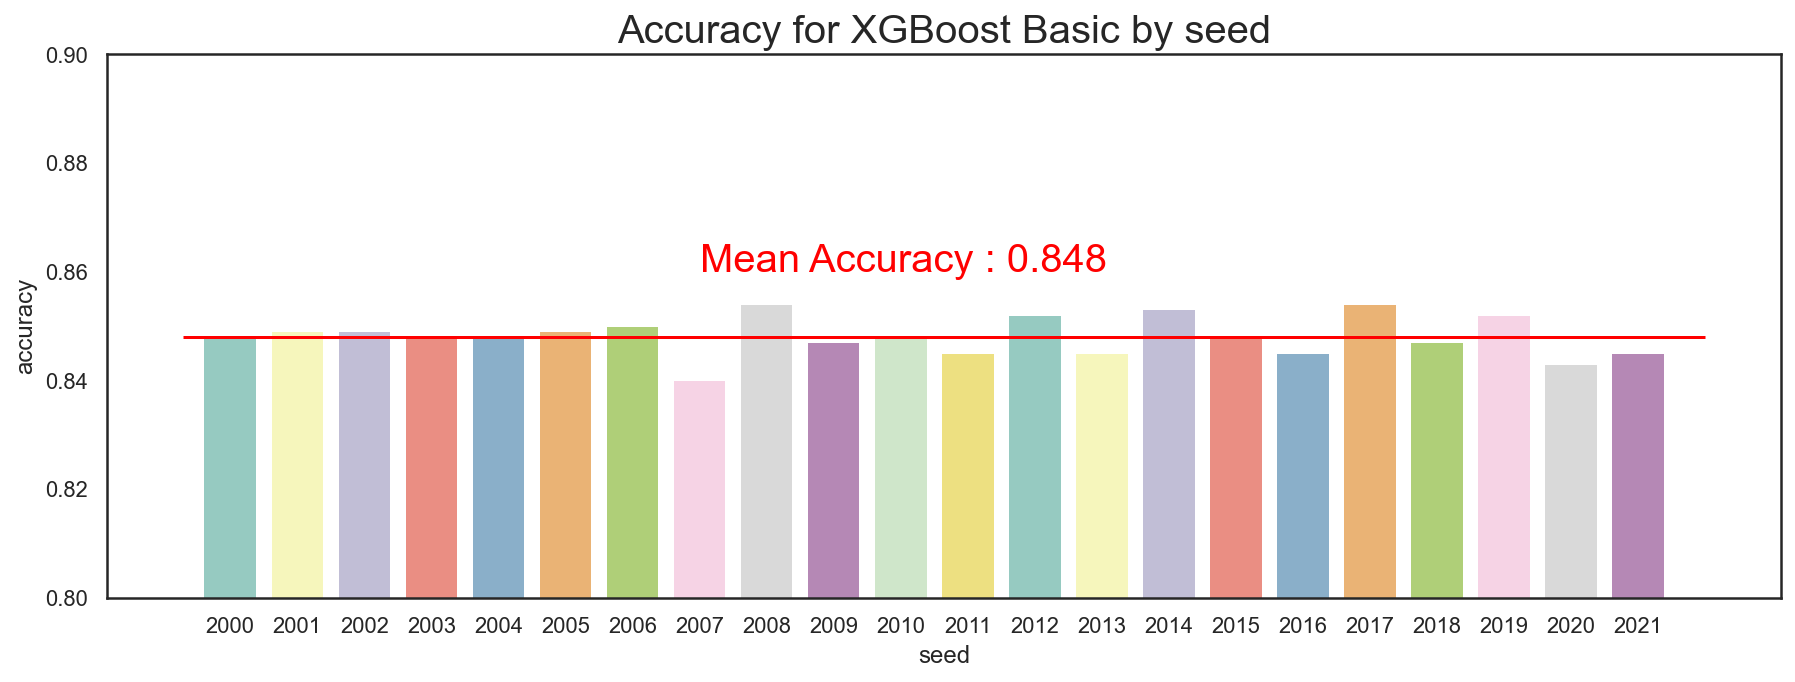

In [690]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.8, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for XGBoost Basic by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.86,'Mean Accuracy : 0.848', fontdict = {'fontsize' : 20}, color = 'red')

In [691]:
# x_train, y_train, x_test, y_test 1번 셋에서의 Accuracy 최대값


정확도: 0.8541
정밀도: 0.8237
재현율: 0.8082
F1: 0.8159
AUC: 0.8464


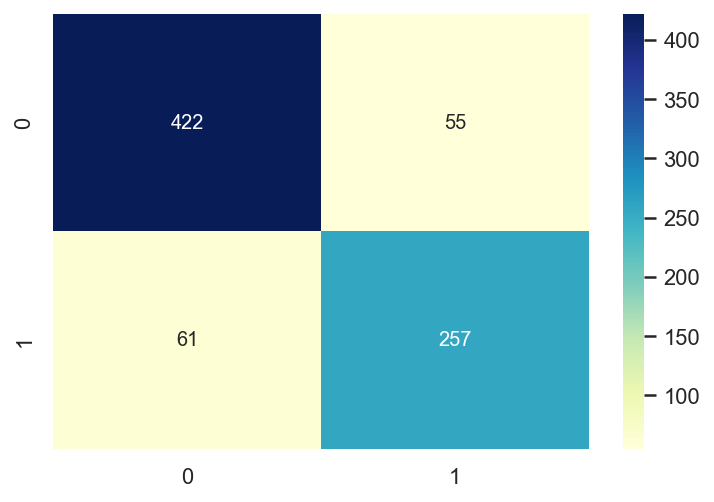

In [692]:
themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 160, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.95, colsample_bytree = 0.8, alpha = 0.01, use_label_encoder=False,  eval_metric='auc', seed = seeds[acc_ls.index(max(acc_ls))])


themodel.fit(x_train, y_train)

y_predict=themodel.predict(x_test)

y_predict_prob = themodel.predict_proba(x_test)


sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(y_test, y_predict)

In [563]:
len(themodel.feature_importances_)

43

In [562]:
len(x_train.columns.to_list())

43

In [531]:
acc_ls.index(max(acc_ls))

8

In [532]:
seeds[acc_ls.index(max(acc_ls))]

2008

In [694]:
list(x_train.columns)

['Education',
 'Default',
 'HHInsurance',
 'CarLoan',
 'Call_StartHour',
 'AgeBin',
 'BalanceBin',
 'LastContactWeekday',
 'LastContactWeekNum',
 'CallDumy',
 'NumConDumy',
 'DayPassedDumy',
 'PrevAttemptsDumy',
 'Job_admin.',
 'Job_blue-collar',
 'Job_entrepreneur',
 'Job_housemaid',
 'Job_management',
 'Job_retired',
 'Job_self-employed',
 'Job_services',
 'Job_student',
 'Job_technician',
 'Job_unemployed',
 'Marital_divorced',
 'Marital_married',
 'Marital_single',
 'LastContactMonth_apr',
 'LastContactMonth_aug',
 'LastContactMonth_dec',
 'LastContactMonth_feb',
 'LastContactMonth_jan',
 'LastContactMonth_jul',
 'LastContactMonth_jun',
 'LastContactMonth_mar',
 'LastContactMonth_may',
 'LastContactMonth_nov',
 'LastContactMonth_oct',
 'LastContactMonth_sep',
 'Outcome_NonePrev',
 'Outcome_failure',
 'Outcome_other',
 'Outcome_success']

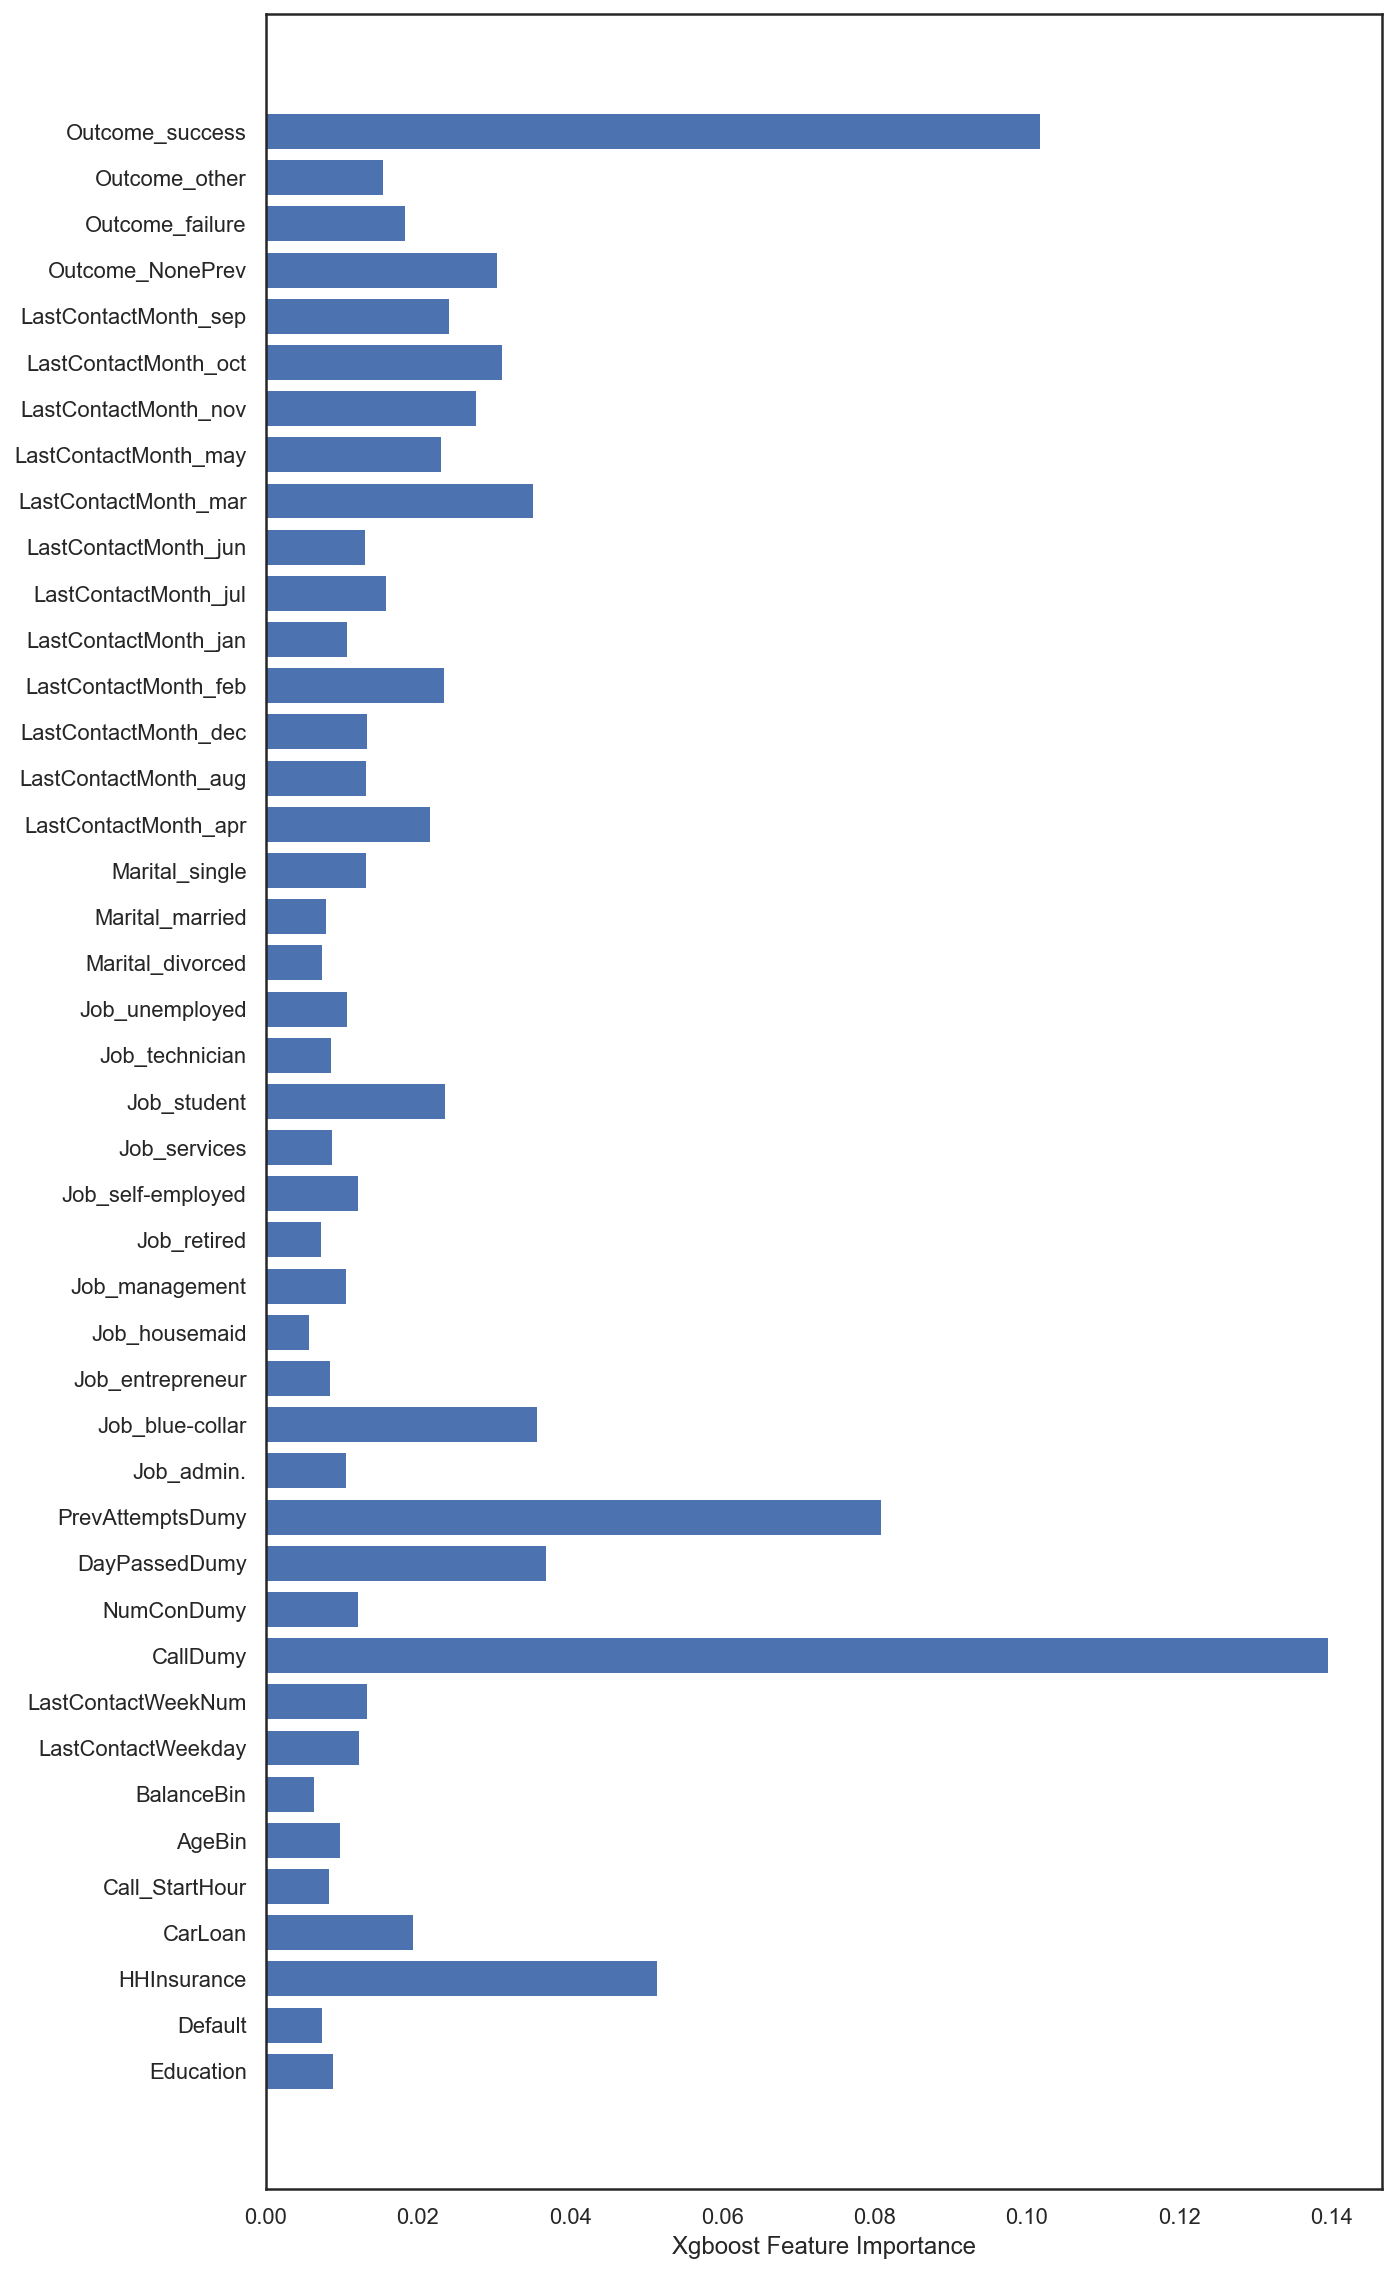

In [700]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,20))
    plt.barh(list(x_train.columns), themodel.feature_importances_)
    plt.xlabel("Xgboost Feature Importance")

### XGBoost - 2. scale_x_train, scale_y_train,  scale_x_test,  scale_y_test

In [450]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1. learning_rate와 n_estimators의 수를 정하자

In [451]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(50, 350, 50)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [452]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.5}

In [453]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1-2. n_estimators의 수를 정하자

learning_rate = 0.1
n_estimators = [i for i in range(100, 250, 10)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [454]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.5}

In [455]:
# 2. max_depth와 min_child_weight를 튜닝한다.

In [456]:
learning_rate = 0.1
n_estimators = 120
max_depth = [i for i in range(3, 10, 1)]
min_child_weight = [i for i in range(1, 6, 1)]
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [457]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : max_depth,
              'min_child_weight' : min_child_weight,
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}

grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.5}

In [458]:
# 3. gamma를 튜닝한다.

learning_rate = 0.1
n_estimators = 120
max_depth = 4
min_child_weight = 1
gamma = [i/10.0 for i in range(0,5,1)]
subsample = 0.5
colsample_bytree = 0.5

In [459]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : gamma,
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.5}

In [460]:
# 4. subsample and colsample_bytree를 튜닝한다.

learning_rate = 0.1
n_estimators = 120
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/10.0 for i in range(4,10)]
colsample_bytree = [i/10.0 for i in range(4,10)]

In [461]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : colsample_bytree}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.9}

In [462]:
# 5. subsample 추가 튜닝하기

learning_rate = 0.1
n_estimators = 120
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/100.0 for i in range(80, 99)]
colsample_bytree = 0.7

In [463]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.93}

In [464]:
# Regularization Parameter 튜닝

learning_rate = 0.1
n_estimators = 120
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.93
colsample_bytree = 0.7
reg_alpha = [0.001, 0.01, 0, 0.1, 1, 10, 100]

In [465]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.93}

In [466]:
# Learning Rate 감소

learning_rate = [i/100.0 for i in range(1,15)]
n_estimators = 120
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.93
colsample_bytree = 0.7
reg_alpha = 0

In [467]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 120,
 'subsample': 0.93}

In [533]:
# seed 별 정확도 최대값

seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 120, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.93, colsample_bytree = 0.7, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seed)


    themodel.fit(scale_x_train, scale_y_train)

    y_predict=themodel.predict(scale_x_test)

    y_predict_prob = themodel.predict_proba(scale_x_test)


    acc = get_accuracy_eval(scale_y_test, y_predict)

    acc_ls.append(acc)

In [534]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

round(np.mean(acc_df.accuracy), 3)

0.833

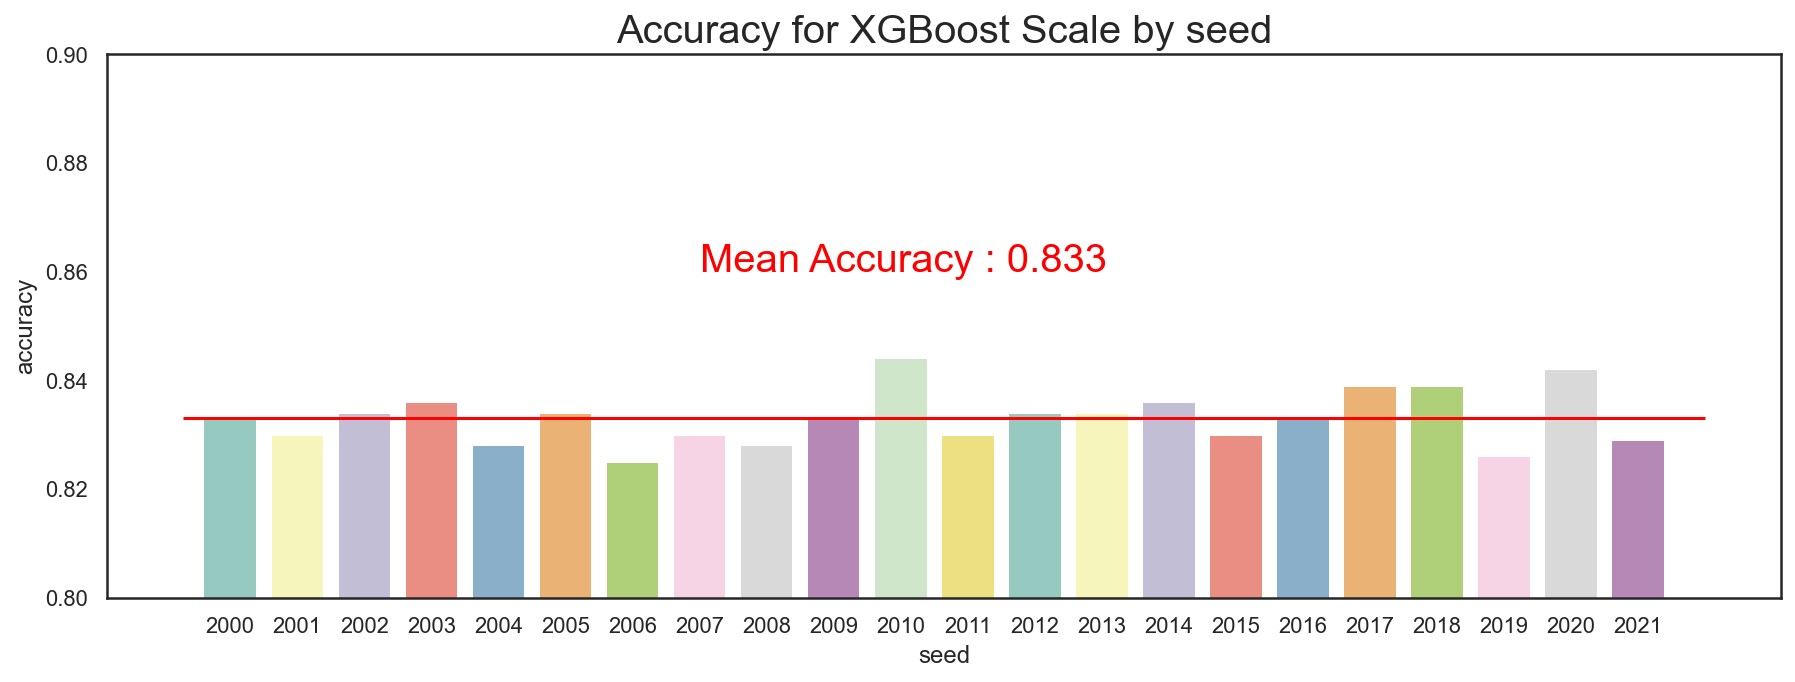

In [535]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.8, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for XGBoost Scale by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.86,'Mean Accuracy : 0.833', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8440
정밀도: 0.8012
재현율: 0.8113
F1: 0.8063
AUC: 0.8386


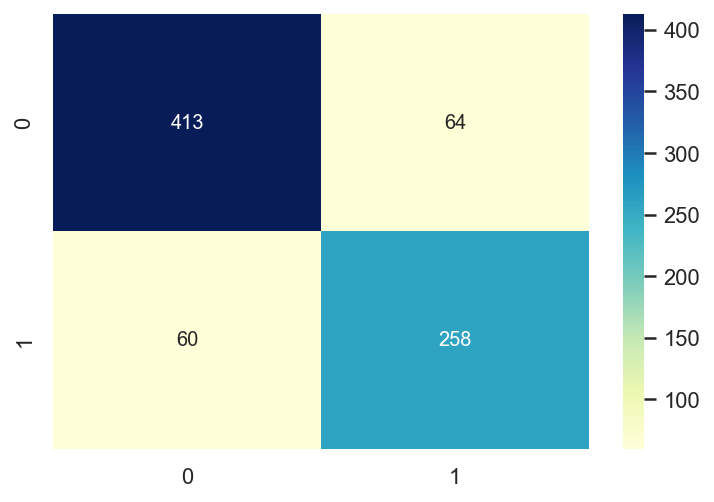

In [536]:
themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 120, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.93, colsample_bytree = 0.7, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seeds[acc_ls.index(max(acc_ls))])



themodel.fit(scale_x_train, scale_y_train)

y_predict=themodel.predict(scale_x_test)

y_predict_prob = themodel.predict_proba(scale_x_test)


sns.heatmap(confusion_matrix(scale_y_test, y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(scale_y_test, y_predict)

In [537]:
acc_ls.index(max(acc_ls))

10

In [538]:
seeds[acc_ls.index(max(acc_ls))]

2010

### XGBoost - 3. pca_x_train,  pca_y_train, x_test, y_test

In [473]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1. learning_rate와 n_estimators의 수를 정하자

In [474]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(50, 350, 50)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [475]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.5}

In [476]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1-2. n_estimators의 수를 정하자

learning_rate = 0.1
n_estimators = [i for i in range(10, 150, 10)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [477]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.5}

In [478]:
# 3. gamma를 튜닝한다.

learning_rate = 0.1
n_estimators = 140
max_depth = 4
min_child_weight = 1
gamma = [i/10.0 for i in range(0,5,1)]
subsample = 0.5
colsample_bytree = 0.5

In [479]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : gamma,
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.5}

In [480]:
# 4. subsample and colsample_bytree를 튜닝한다.

learning_rate = 0.1
n_estimators = 140
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/10.0 for i in range(4,10)]
colsample_bytree = [i/10.0 for i in range(4,10)]

In [481]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : colsample_bytree}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.5}

In [482]:
# 5. subsample 추가 튜닝하기

learning_rate = 0.1
n_estimators = 140
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = [i/100.0 for i in range(40, 60)]
colsample_bytree = 0.5

In [483]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.52}

In [484]:
# Regularization Parameter 튜닝

learning_rate = 0.1
n_estimators = 140
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.52
colsample_bytree = 0.5
reg_alpha = [0.001, 0.01, 0, 0.1, 1, 10, 100]

In [485]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : reg_alpha}

grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.52}

In [486]:
# Learning Rate 감소

learning_rate = [i/100.0 for i in range(1,15)]
n_estimators = 140
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.52
colsample_bytree = 0.5
reg_alpha = 0

In [487]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : [reg_alpha]}

grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 140,
 'subsample': 0.52}

In [676]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 140, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.52, colsample_bytree = 0.5, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seed)


    themodel.fit(pca_x_train, y_train)

    y_predict=themodel.predict(pca_x_test)

    y_predict_prob = themodel.predict_proba(pca_x_test)



    acc = get_accuracy_eval(y_test, y_predict)

    acc_ls.append(acc)

In [677]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

round(np.mean(acc_df.accuracy), 3)

0.793

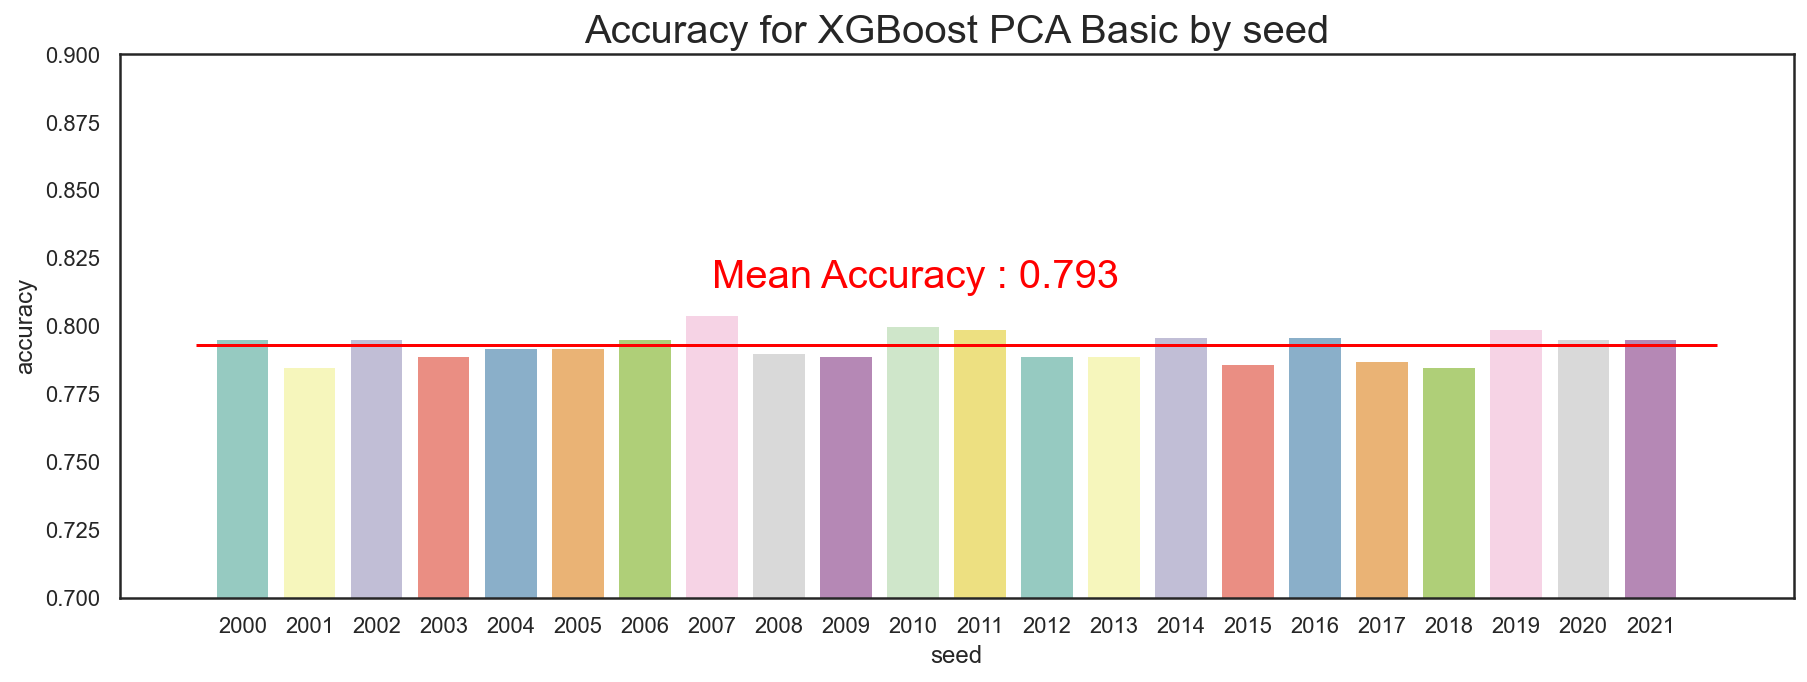

In [678]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.7, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for XGBoost PCA Basic by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.814,'Mean Accuracy : 0.793', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8038
정밀도: 0.7630
재현율: 0.7390
F1: 0.7508
AUC: 0.7930


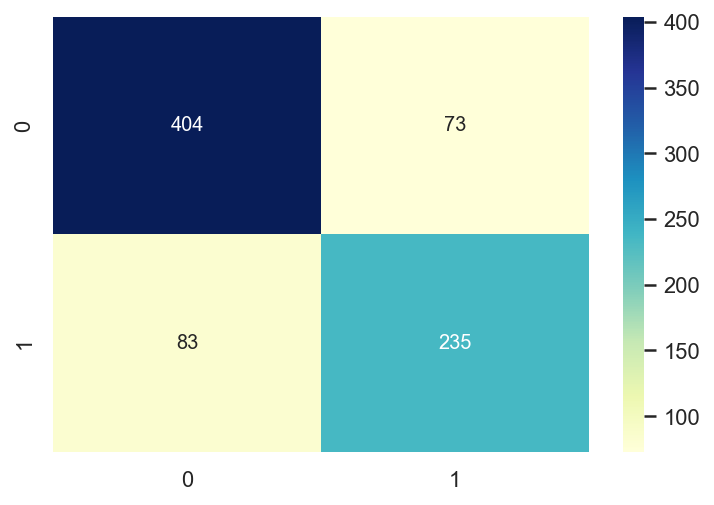

In [679]:
themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 140, max_depth = 4, min_child_weight = 1, gamma = 0, subsample = 0.52, colsample_bytree = 0.5, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seeds[acc_ls.index(max(acc_ls))])



themodel.fit(pca_x_train, y_train)

y_predict=themodel.predict(pca_x_test)

y_predict_prob = themodel.predict_proba(pca_x_test)


sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(y_test, y_predict)

In [545]:
seeds[acc_ls.index(max(acc_ls))]

2007

### XGBoost - 4. pca_scale_x_train,  scale_y_train, pca_scale_x_test,  scale_y_test

In [491]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1. learning_rate와 n_estimators의 수를 정하자

In [492]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(50, 350, 50)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [493]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)

results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.5}

In [494]:
# 초기 하이퍼 파라미터에 대한 범위를 지정하자.
# 1-2. n_estimators의 수를 정하자

learning_rate = 0.1
n_estimators = [i for i in range(100, 250, 10)]
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.5
colsample_bytree = 0.5

In [495]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : n_estimators,
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.5}

In [496]:
# 3. gamma를 튜닝한다.

learning_rate = 0.1
n_estimators = 150
max_depth = 4
min_child_weight = 1
gamma = [i/10.0 for i in range(0,5,1)]
subsample = 0.5
colsample_bytree = 0.5

In [497]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : gamma,
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.5}

In [498]:
# 4. subsample and colsample_bytree를 튜닝한다.

learning_rate = 0.1
n_estimators = 150
max_depth = 4
min_child_weight = 1
gamma = 0.4
subsample = [i/10.0 for i in range(4,10)]
colsample_bytree = [i/10.0 for i in range(4,10)]

In [499]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : colsample_bytree}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.8}

In [501]:
# 5. subsample 추가 튜닝하기

learning_rate = 0.1
n_estimators = 150
max_depth = 4
min_child_weight = 1
gamma = 0.4
subsample = [i/100.0 for i in range(70, 100)]
colsample_bytree = 0.5

In [502]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : subsample,
               'colsample_bytree' : [colsample_bytree]}


grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.84}

In [503]:
# Regularization Parameter 튜닝

learning_rate = 0.1
n_estimators = 150
max_depth = 4
min_child_weight = 1
gamma = 0.4
subsample = 0.84
colsample_bytree = 0.5
reg_alpha = [0.001, 0.01, 0, 0.1, 1, 10, 100]

In [504]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : [learning_rate],
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : reg_alpha}

grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.84}

In [505]:
# Learning Rate 감소

learning_rate = [i/100.0 for i in range(1,15)]
n_estimators = 150
max_depth = 4
min_child_weight = 1
gamma = 0.4
subsample = 0.84
colsample_bytree = 0.5
reg_alpha = 0

In [506]:
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False,  eval_metric='auc', objective = 'binary:logistic')

param_grid = {'booster':['gbtree'], 
              'learning_rate' : learning_rate,
              'n_estimators' : [n_estimators],
              'max_depth' : [max_depth],
              'min_child_weight' : [min_child_weight],
              'gamma' : [gamma],
              'subsample' : [subsample],
               'colsample_bytree' : [colsample_bytree],
               'alpha' : [reg_alpha]}

grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)


results.best_params_

{'alpha': 0,
 'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.84}

In [672]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 150, max_depth = 4, min_child_weight = 1, gamma = 0.4, subsample = 0.84, colsample_bytree = 0.5, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seed)


    themodel.fit(pca_scale_x_train, scale_y_train)

    y_predict=themodel.predict(pca_scale_x_test)

    y_predict_prob = themodel.predict_proba(pca_scale_x_test)



    acc = get_accuracy_eval(scale_y_test, y_predict)

    acc_ls.append(acc)

In [673]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

round(np.mean(acc_df.accuracy), 3)

0.789

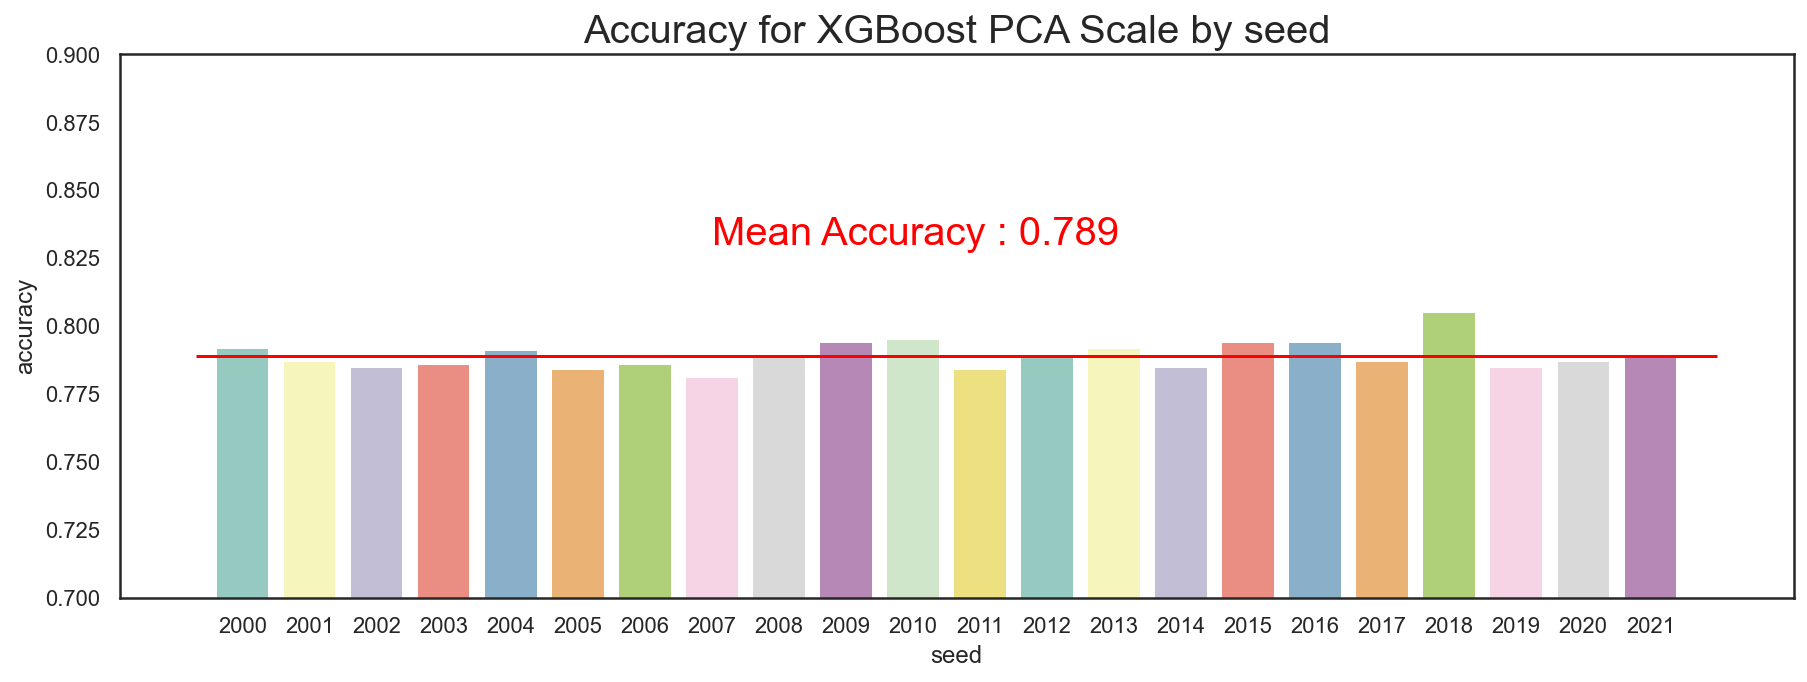

In [674]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.7, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for XGBoost PCA Scale by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.83,'Mean Accuracy : 0.789', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8050
정밀도: 0.7708
재현율: 0.7296
F1: 0.7496
AUC: 0.7925


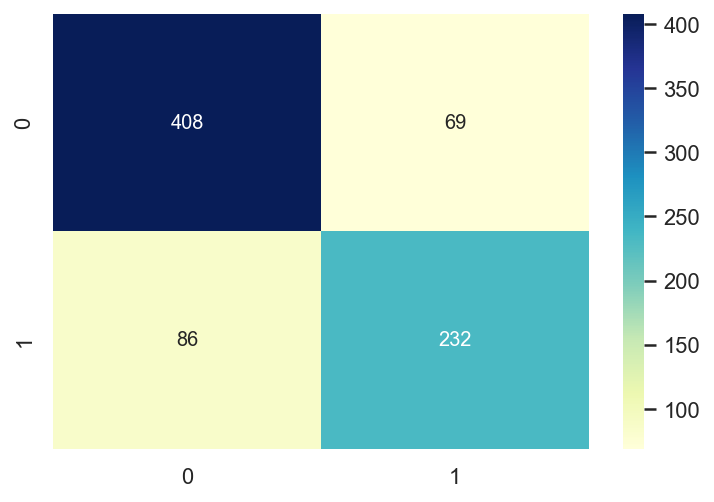

In [675]:
themodel = xgboost.XGBClassifier(booster='gbtree', learning_rate = 0.1, n_estimators = 150, max_depth = 4, min_child_weight = 1, gamma = 0.4, subsample = 0.84, colsample_bytree = 0.5, alpha = 0, use_label_encoder=False,  eval_metric='auc', seed = seeds[acc_ls.index(max(acc_ls))])



themodel.fit(pca_scale_x_train, scale_y_train)

y_predict=themodel.predict(pca_scale_x_test)

y_predict_prob = themodel.predict_proba(pca_scale_x_test)


sns.heatmap(confusion_matrix(scale_y_test, y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(scale_y_test, y_predict)

In [550]:
seeds[acc_ls.index(max(acc_ls))]

2018

## Light Gradient Boost

###  Light Gradient Boost - 1. x_train, y_train, x_test, y_test

In [564]:
from lightgbm import LGBMClassifier

In [565]:
# LGBM 하이퍼 파라미터 튜닝 순서
# 참고 : https://psystat.tistory.com/131
# 1. learning_rate, n_estimator를 함께 튜닝
# 2. max_depth는 -1이 가장 좋다고 알려져 있음, max_depth와 Maximum Leaves, min_child_samples를 함께 튜닝
# 3. Row Sample(subsample)와 Column Sampling by Tree(colsample_bytree)를 함께 튜닝
# 4. 과적합 제어를 위헤 reg_alpha를 튜닝
# 5. 마지막 learning_rate를 다시 튜닝

In [566]:
# 1. learning_rate, n_estimator를 함께 튜닝

In [567]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(10, 350, 10)]
max_depth = -1
num_leaves = 31
min_child_samples = 20
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [568]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'n_estimators': 50,
 'num_leaves': 31,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 2. max_depth는 -1이 가장 좋다고 알려져 있음, max_depth와 Maximum Leaves, min_child_samples를 함께 튜닝

In [569]:
learning_rate = 0.1
n_estimators = 50
max_depth = [i for i in range(-1, 6, 1)]
num_leaves = [i for i in range(20, 50, 2)]
min_child_samples = [i for i in range(20, 50, 2)]
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [570]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : max_depth,
              'num_leaves' : num_leaves,
              'min_child_samples' : min_child_samples,
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 24,
 'n_estimators': 50,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 3. Row Sample(subsample)와 Column Sampling by Tree(colsample_bytree)를 함께 튜닝

In [571]:
learning_rate = 0.1
n_estimators = 50
max_depth = -1
num_leaves = 24
min_child_samples = 24
subsample_freq = 1
subsample = [i/10.0 for i in range(1,10)]
colsample_bytree = [i/10.0 for i in range(1,10)]
reg_alpha = 0

In [572]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : subsample,
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : colsample_bytree,
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 24,
 'n_estimators': 50,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [ ]:
# 규제

In [573]:
learning_rate = 0.1
n_estimators = 50
max_depth = -1
num_leaves = 24
min_child_samples = 24
subsample_freq = 1
subsample = 0.9
colsample_bytree = 0.5
reg_alpha = [0.01, 0.1, 0, 1, 10, 100]

In [574]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 24,
 'n_estimators': 50,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [576]:
# 학습속도

In [578]:
learning_rate = learning_rate = [i/100.0 for i in range(1,15)]
n_estimators = 50
max_depth = -1
num_leaves = 24
min_child_samples = 24
subsample_freq = 1
subsample = 0.9
colsample_bytree = 0.5
reg_alpha = 0

In [579]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 24,
 'n_estimators': 50,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [588]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 50, max_depth = -1, num_leaves = 24, min_child_samples = 24, subsample = 0.9, colsample_bytree = 0.5, reg_alpha = 0, subsample_freq = 1, seed = seed)


    themodel.fit(x_train, y_train)

    y_predict=themodel.predict(x_test)

    y_predict_prob = themodel.predict_proba(x_test)

    acc = get_accuracy_eval(y_test, y_predict)

    acc_ls.append(acc)

In [589]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)
round(np.mean(acc_df.accuracy), 3)

0.84

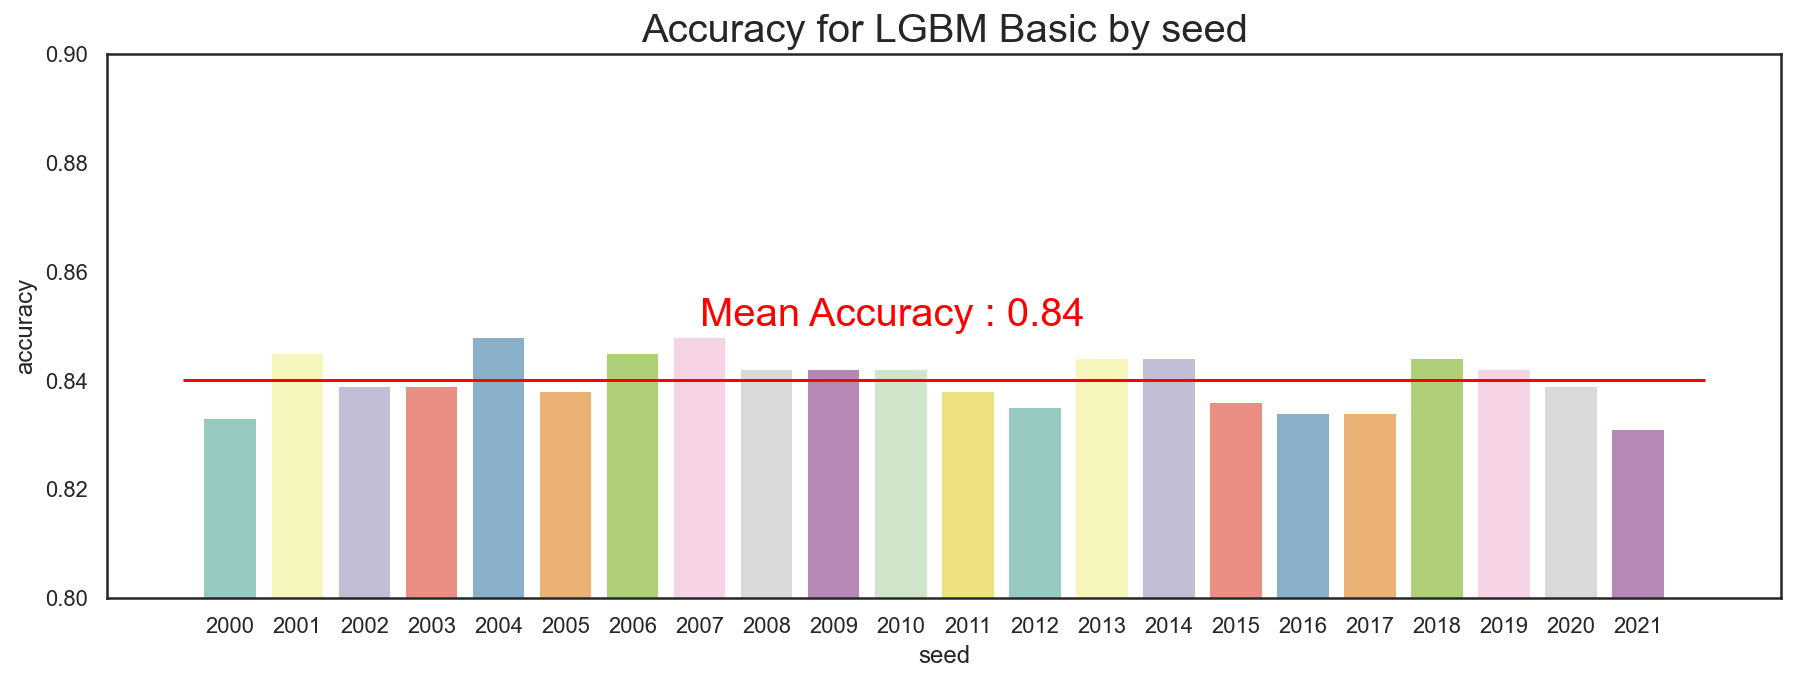

In [592]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.8, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for LGBM Basic by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.85,'Mean Accuracy : 0.84', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8415
정밀도: 0.8097
재현율: 0.7893
F1: 0.7994
AUC: 0.8328


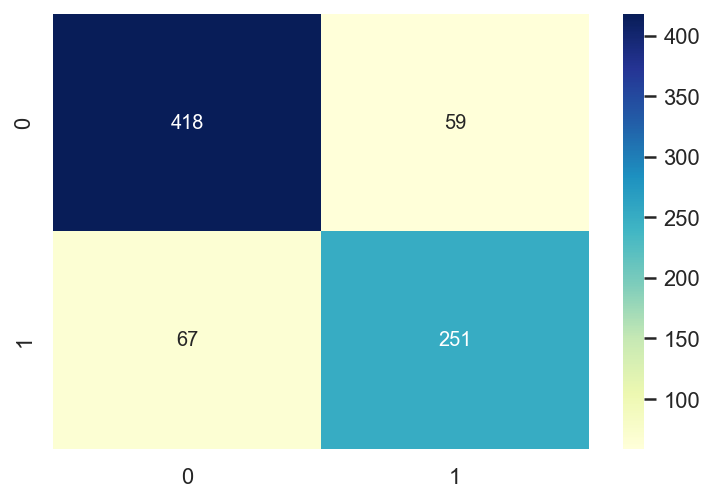

In [584]:
themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 60, max_depth = -1, num_leaves = 42, min_child_samples = 24, subsample = 0.5, colsample_bytree = 0.4, reg_alpha = 0, subsample_freq = 1, seed = seeds[acc_ls.index(max(acc_ls))])


themodel.fit(x_train, y_train)

y_predict=themodel.predict(x_test)

y_predict_prob = themodel.predict_proba(x_test)


sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(y_test, y_predict)

In [593]:
seeds[acc_ls.index(max(acc_ls))]

2004

### Light Gradient Boost - 2. scale_x_train. scale_y_train, scale_x_test,  scale_y_test

In [594]:
# 1. learning_rate, n_estimator를 함께 튜닝

In [595]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(10, 350, 10)]
max_depth = -1
num_leaves = 31
min_child_samples = 20
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [596]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': -1,
 'min_child_samples': 20,
 'n_estimators': 30,
 'num_leaves': 31,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [597]:
# 2. max_depth는 -1이 가장 좋다고 알려져 있음, max_depth와 Maximum Leaves, min_child_samples를 함께 튜닝

In [598]:
learning_rate = 0.2
n_estimators = 30
max_depth = [i for i in range(-1, 10, 1)]
num_leaves = [i for i in range(20, 50, 2)]
min_child_samples = [i for i in range(20, 50, 2)]
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [599]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : max_depth,
              'num_leaves' : num_leaves,
              'min_child_samples' : min_child_samples,
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_samples': 22,
 'n_estimators': 30,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [600]:
# 3. Row Sample(subsample)와 Column Sampling by Tree(colsample_bytree)를 함께 튜닝

In [601]:
learning_rate = 0.2
n_estimators = 30
max_depth = 6
num_leaves = 24
min_child_samples = 22
subsample_freq = 1
subsample = [i/10.0 for i in range(1,10)]
colsample_bytree = [i/10.0 for i in range(1,10)]
reg_alpha = 0

In [602]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : subsample,
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : colsample_bytree,
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_samples': 22,
 'n_estimators': 30,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [ ]:
# 규제

In [603]:
learning_rate = 0.2
n_estimators = 30
max_depth = 6
num_leaves = 24
min_child_samples = 22
subsample_freq = 1
subsample = 0.9
colsample_bytree = 0.6
reg_alpha = [0.01, 0.1, 0, 1, 10, 100]

In [604]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_samples': 22,
 'n_estimators': 30,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [ ]:
# learning rate 재튜닝

In [605]:
learning_rate = learning_rate = [i/100.0 for i in range(1,30)]
n_estimators = 30
max_depth = 6
num_leaves = 24
min_child_samples = 22
subsample_freq = 1
subsample = 0.9
colsample_bytree = 0.6
reg_alpha = 0

In [606]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_samples': 22,
 'n_estimators': 30,
 'num_leaves': 24,
 'reg_alpha': 0,
 'subsample': 0.9,
 'subsample_freq': 1}

In [607]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.2, n_estimators = 30, max_depth = 6, num_leaves = 24, min_child_samples = 22, subsample = 0.9, colsample_bytree = 0.6, reg_alpha = 0, subsample_freq = 1, seed = seed)


    themodel.fit(scale_x_train, scale_y_train)

    y_predict=themodel.predict(scale_x_test)

    y_predict_prob = themodel.predict_proba(scale_x_test)

    acc = get_accuracy_eval(scale_y_test, y_predict)

    acc_ls.append(acc)

In [608]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

round(np.mean(acc_df.accuracy), 3)

0.833

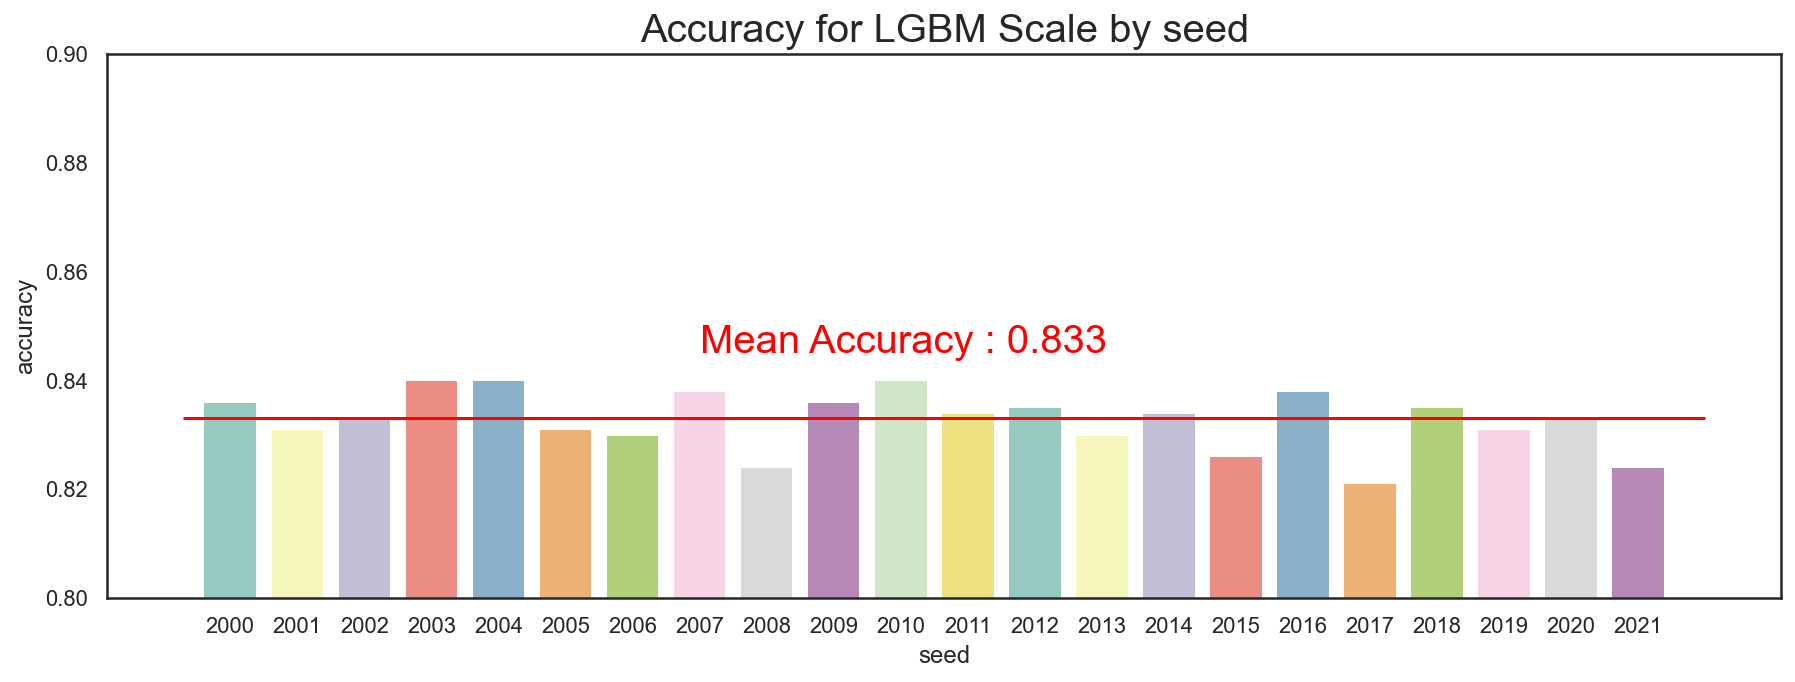

In [612]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.8, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for LGBM Scale by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.845,'Mean Accuracy : 0.833', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8403
정밀도: 0.7957
재현율: 0.8082
F1: 0.8019
AUC: 0.8349


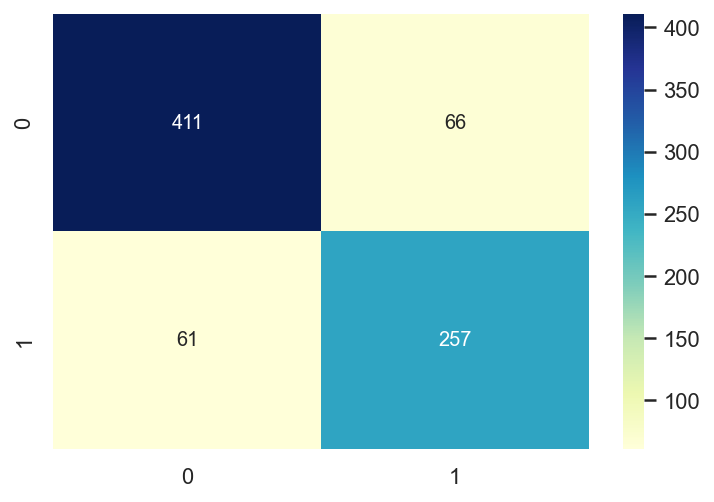

In [613]:
themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.2, n_estimators = 30, max_depth = 6, num_leaves = 24, min_child_samples = 22, subsample = 0.9, colsample_bytree = 0.6, reg_alpha = 0, subsample_freq = 1, seed =seeds[acc_ls.index(max(acc_ls))])


themodel.fit(scale_x_train, scale_y_train)

y_predict=themodel.predict(scale_x_test)

y_predict_prob = themodel.predict_proba(scale_x_test)


sns.heatmap(confusion_matrix(scale_y_test,y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(scale_y_test, y_predict)

In [614]:
seeds[acc_ls.index(max(acc_ls))]

2003

### Light Gradient Boost - 3 pca_x_train. y_train, pca_x_test,  y_test

In [622]:
# 1. learning_rate, n_estimator를 함께 튜닝

In [623]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(10, 350, 10)]
max_depth = -1
num_leaves = 31
min_child_samples = 20
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [624]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'n_estimators': 100,
 'num_leaves': 31,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 2. max_depth는 -1이 가장 좋다고 알려져 있음, max_depth와 Maximum Leaves, min_child_samples를 함께 튜닝

In [625]:
learning_rate = 0.1
n_estimators = 100
max_depth = [i for i in range(-1, 6, 1)]
num_leaves = [i for i in range(20, 50, 2)]
min_child_samples = [i for i in range(20, 50, 2)]
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [626]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : max_depth,
              'num_leaves' : num_leaves,
              'min_child_samples' : min_child_samples,
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 30,
 'n_estimators': 100,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 3. Row Sample(subsample)와 Column Sampling by Tree(colsample_bytree)를 함께 튜닝

In [627]:
learning_rate = 0.1
n_estimators = 100
max_depth = 4
num_leaves = 20
min_child_samples = 30
subsample_freq = 1
subsample = [i/10.0 for i in range(1,10)]
colsample_bytree = [i/10.0 for i in range(1,10)]
reg_alpha = 0

In [628]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : subsample,
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : colsample_bytree,
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 30,
 'n_estimators': 100,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.4,
 'subsample_freq': 1}

In [ ]:
# 규제

In [629]:
learning_rate = 0.1
n_estimators = 100
max_depth = 4
num_leaves = 20
min_child_samples = 30
subsample_freq = 1
subsample = 0.4
colsample_bytree = 0.7
reg_alpha = [0.01, 0.1, 0, 1, 10, 100]

In [630]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_x_train, y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_x_train, y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 30,
 'n_estimators': 100,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.4,
 'subsample_freq': 1}

In [ ]:
# 최적의 하이퍼파라미터 값

In [631]:
learning_rate = 0.1
n_estimators = 100
max_depth = 4
num_leaves = 20
min_child_samples = 30
subsample_freq = 1
subsample = 0.4
colsample_bytree = 0.7
reg_alpha = 0

In [654]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 100, max_depth = 4, num_leaves = 20, min_child_samples = 30, subsample = 0.4, colsample_bytree = 0.7, reg_alpha = 0, subsample_freq = 1, seed = seed)


    themodel.fit(pca_x_train, y_train)

    y_predict=themodel.predict(pca_x_test)

    y_predict_prob = themodel.predict_proba(pca_x_test)

    acc = get_accuracy_eval(y_test, y_predict)

    acc_ls.append(acc)

In [655]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

In [656]:
round(np.mean(acc_df.accuracy), 3)

0.794

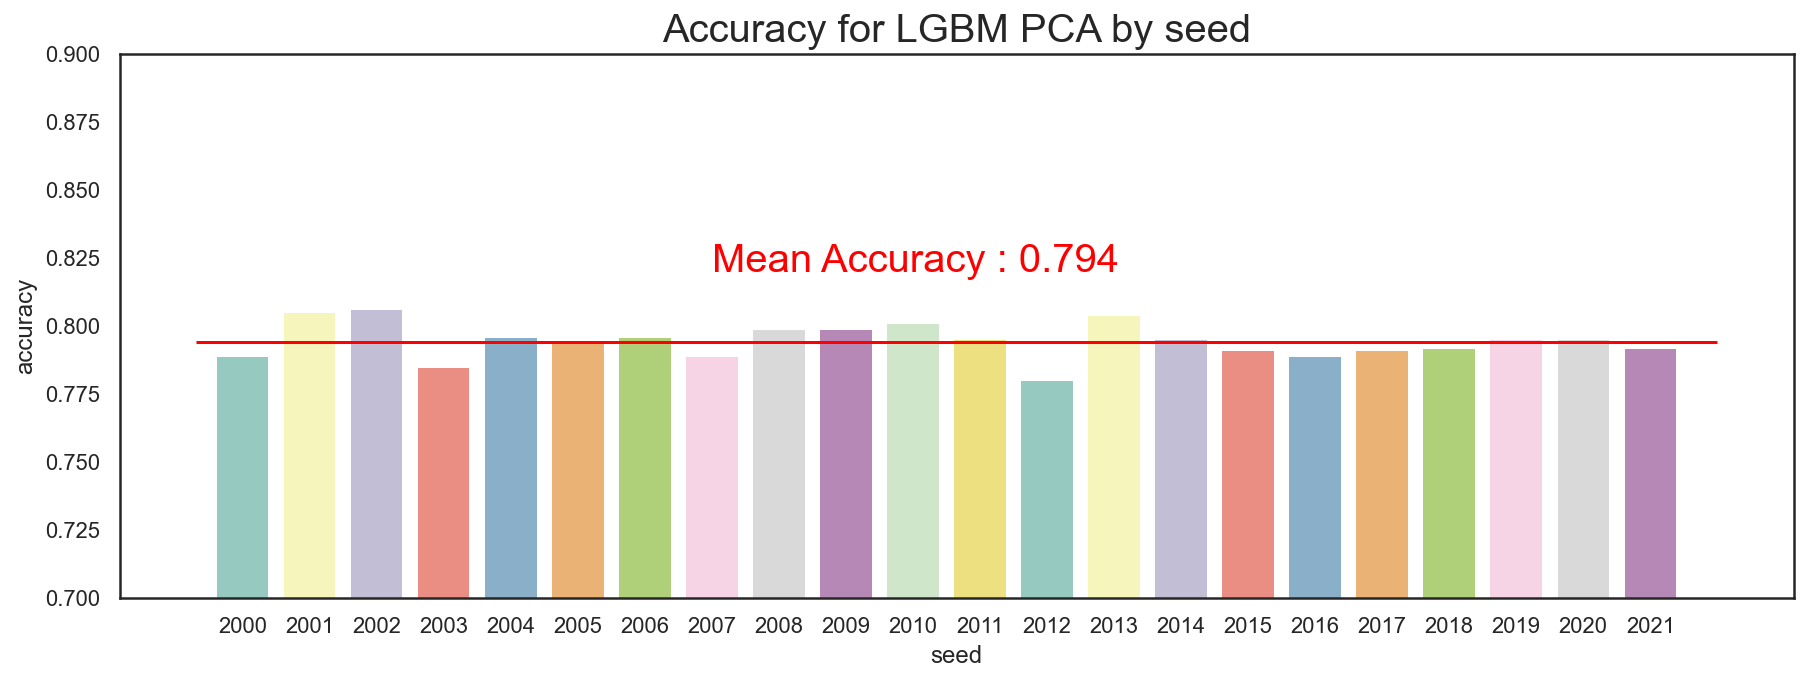

In [657]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.7, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for LGBM PCA by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.82,'Mean Accuracy : 0.794', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.8063
정밀도: 0.7680
재현율: 0.7390
F1: 0.7532
AUC: 0.7951


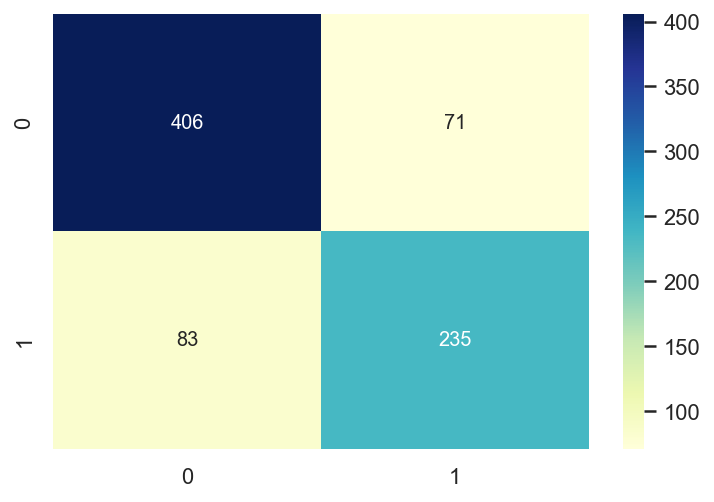

In [658]:
themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 100, max_depth = 4, num_leaves = 20, min_child_samples = 30, subsample = 0.4, colsample_bytree = 0.7, reg_alpha = 0, subsample_freq = 1, seed = seeds[acc_ls.index(max(acc_ls))])


themodel.fit(pca_x_train, y_train)

y_predict=themodel.predict(pca_x_test)

y_predict_prob = themodel.predict_proba(pca_x_test)


sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(y_test, y_predict)

In [659]:
seeds[acc_ls.index(max(acc_ls))]

2002

### Light Gradient Boost - 4 pca_scale_x_train. scale_y_train, pca_scale_x_test,  scale_y_test

In [640]:
# 1. learning_rate, n_estimator를 함께 튜닝

In [641]:
learning_rate = [i/10.0 for i in range(1,5)]
n_estimators = [i for i in range(10, 350, 10)]
max_depth = -1
num_leaves = 31
min_child_samples = 20
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [642]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'n_estimators': 90,
 'num_leaves': 31,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 2. max_depth는 -1이 가장 좋다고 알려져 있음, max_depth와 Maximum Leaves, min_child_samples를 함께 튜닝

In [643]:
learning_rate = 0.1
n_estimators = 90
max_depth = [i for i in range(-1, 6, 1)]
num_leaves = [i for i in range(20, 50, 2)]
min_child_samples = [i for i in range(20, 50, 2)]
subsample = 0.5
subsample_freq = 1
colsample_bytree = 0.5
reg_alpha = 0

In [644]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : max_depth,
              'num_leaves' : num_leaves,
              'min_child_samples' : min_child_samples,
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 26,
 'n_estimators': 90,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.5,
 'subsample_freq': 1}

In [ ]:
# 3. Row Sample(subsample)와 Column Sampling by Tree(colsample_bytree)를 함께 튜닝

In [645]:
learning_rate = 0.1
n_estimators = 90
max_depth = 3
num_leaves = 20
min_child_samples = 26
subsample_freq = 1
subsample = [i/10.0 for i in range(1,10)]
colsample_bytree = [i/10.0 for i in range(1,10)]
reg_alpha = 0

In [646]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : subsample,
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : colsample_bytree,
              'reg_alpha' : [reg_alpha]}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 26,
 'n_estimators': 90,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.7,
 'subsample_freq': 1}

In [ ]:
# 규제

In [647]:
learning_rate = 0.1
n_estimators = 90
max_depth = 3
num_leaves = 20
min_child_samples = 26
subsample_freq = 1
subsample = 0.7
colsample_bytree = 0.7
reg_alpha = [0.01, 0.1, 0, 1, 10, 100]

In [648]:
lgb_clf = LGBMClassifier(objective = 'binary')

param_grid = {'boosting_type':['gbdt'], 
              'learning_rate': [learning_rate],
              'n_estimators': [n_estimators],
              'max_depth' : [max_depth],
              'num_leaves' : [num_leaves],
              'min_child_samples' : [min_child_samples],
              'subsample' : [subsample],
              'subsample_freq' : [subsample_freq],
              'colsample_bytree' : [colsample_bytree],
              'reg_alpha' : reg_alpha}


grid_search = GridSearchCV(estimator=lgb_clf, 
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv=list(StratifiedKFold(n_splits=5).split(pca_scale_x_train, scale_y_train)),
                           scoring='accuracy')

results=grid_search.fit(pca_scale_x_train, scale_y_train)

results.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 26,
 'n_estimators': 90,
 'num_leaves': 20,
 'reg_alpha': 0,
 'subsample': 0.7,
 'subsample_freq': 1}

In [ ]:
# 최적의 하이퍼파라미터 값

In [660]:
learning_rate = 0.1
n_estimators = 90
max_depth = 3
num_leaves = 20
min_child_samples = 26
subsample_freq = 1
subsample = 0.7
colsample_bytree = 0.7
reg_alpha = 0

In [680]:
seeds = [i for i in range(2000, 2022)]
acc_ls = []

for seed in seeds:
    
    themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 90, max_depth = 3, num_leaves = 20, min_child_samples = 26, subsample = 0.7, colsample_bytree = 0.7, reg_alpha = 0, subsample_freq = 1, seed = seed)


    themodel.fit(pca_scale_x_train, scale_y_train)

    y_predict=themodel.predict(pca_scale_x_test)

    y_predict_prob = themodel.predict_proba(pca_scale_x_test)

    acc = get_accuracy_eval(scale_y_test, y_predict)

    acc_ls.append(acc)

In [681]:
acc_df = pd.DataFrame({"accuracy" : acc_ls,
                       "seed" : seeds})

acc_df = acc_df.round(3)

In [682]:
round(np.mean(acc_df.accuracy), 3)

0.785

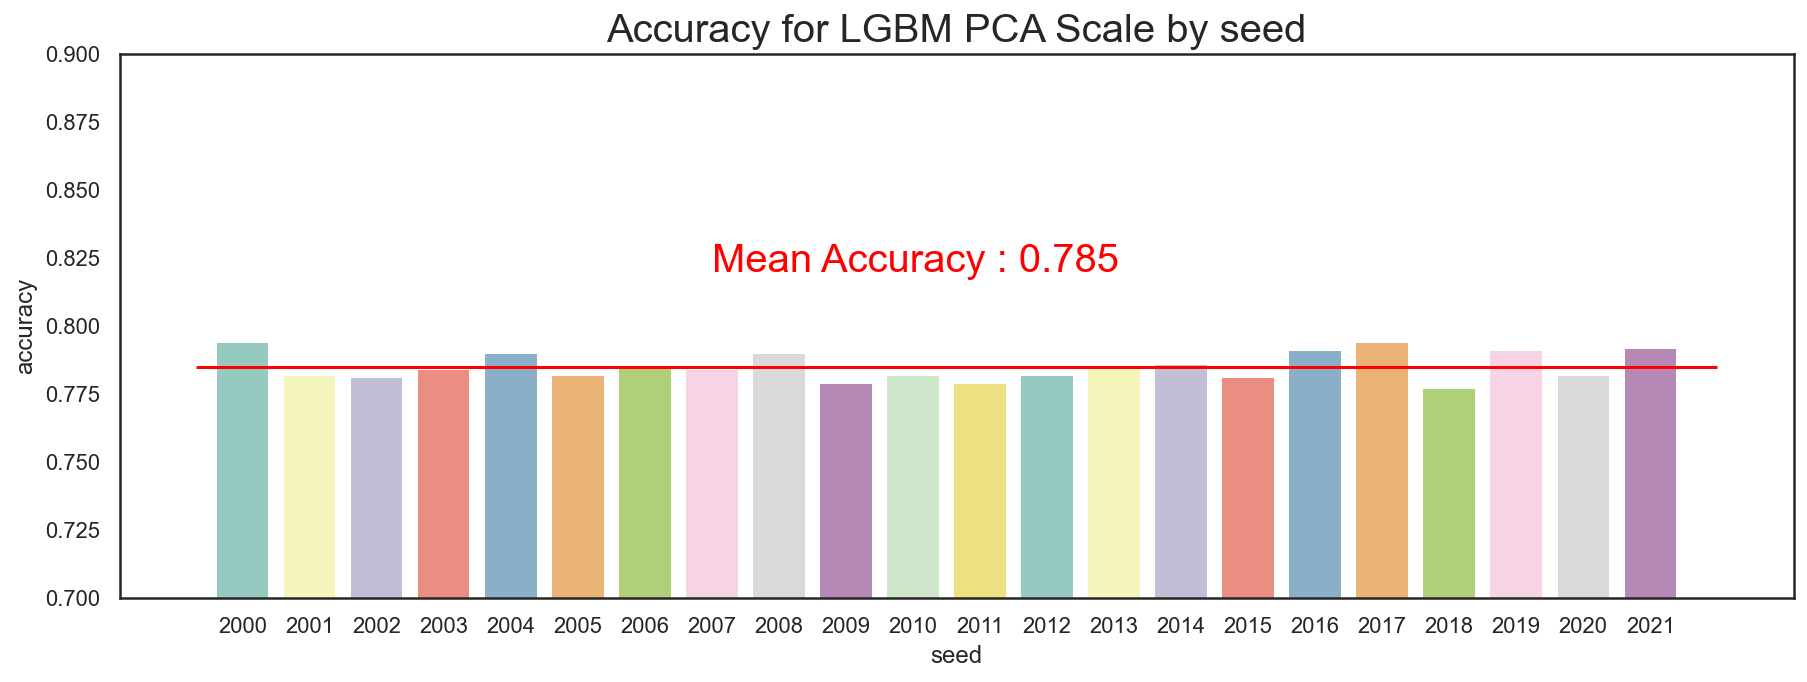

In [683]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    plt.ylim(0.7, 0.9)
    sns.barplot(x = "seed", y = "accuracy", data = acc_df, palette='Set3')
    plt.title("Accuracy for LGBM PCA Scale by seed", fontsize = 20)
    plt.hlines(round(np.mean(acc_df.accuracy), 3), -0.7, 22, color='red')
    plt.text(7, 0.82,'Mean Accuracy : 0.785', fontdict = {'fontsize' : 20}, color = 'red')


정확도: 0.7937
정밀도: 0.7533
재현율: 0.7201
F1: 0.7363
AUC: 0.7814


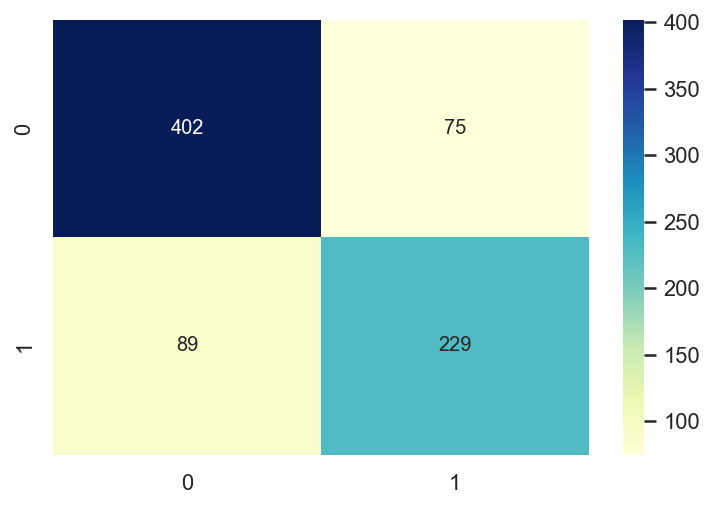

In [684]:
themodel = LGBMClassifier(boosting_type='gbdt', learning_rate = 0.1, n_estimators = 90, max_depth = 3, num_leaves = 20, min_child_samples = 26, subsample = 0.7, colsample_bytree = 0.7, reg_alpha = 0, subsample_freq = 1, seed = seeds[acc_ls.index(max(acc_ls))])


themodel.fit(pca_scale_x_train, scale_y_train)

y_predict=themodel.predict(pca_scale_x_test)

y_predict_prob = themodel.predict_proba(pca_scale_x_test)


sns.heatmap(confusion_matrix(scale_y_test,y_predict),annot=True,fmt='d',cmap='YlGnBu')

get_clf_eval(scale_y_test, y_predict)